In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from helper import visualize_input, plot_images
from matplotlib import pyplot as plt

In [2]:
X_train = np.load('train_images.npy')
y_train = np.loadtxt('train_labels.csv', delimiter=',', skiprows=1)
X_test = np.load('test_images.npy')
y_test = np.loadtxt('test_labels.csv', delimiter=',', skiprows=1)[:,0]

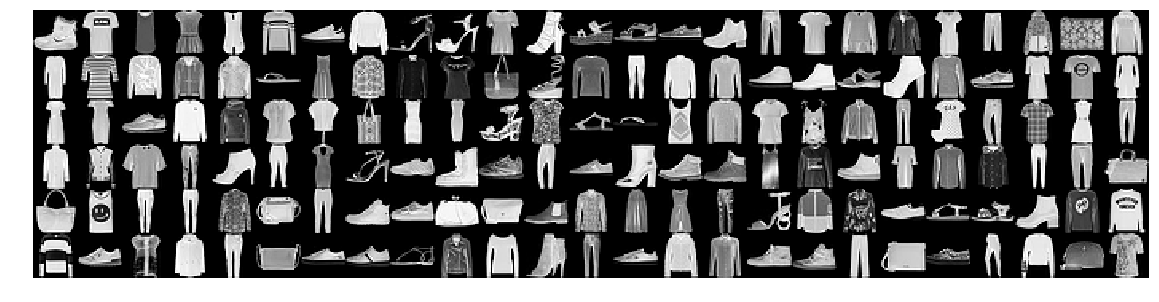

In [3]:
plot_images(X_train, 150, 25)

In [4]:
from HistogramBasedNaiveBayes import HistogramBasedNaiveBayes as HistogramBasedNaiveBayes

In [18]:
X_train_reshaped = X_train.reshape(X_train.shape[0],-1)
histogramBasedNaiveBayes_clf = HistogramBasedNaiveBayes()
%time histogramBasedNaiveBayes_clf.fit(X_train_reshaped, y_train)

CPU times: user 1min 13s, sys: 639 ms, total: 1min 14s
Wall time: 1min 17s


In [19]:
print(histogramBasedNaiveBayes_clf.class_count_)
print(histogramBasedNaiveBayes_clf.classes_)
print(histogramBasedNaiveBayes_clf.class_prior_)
print(histogramBasedNaiveBayes_clf.sample_space_.shape)
print(histogramBasedNaiveBayes_clf.histograms_matrix_.shape)

[6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]
[0 1 2 3 4 5 6 7 8 9]
[ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]
(256,)
(10, 784, 256)


In [46]:
classes_names = {
    0:'T-shirt/top',
    1:'Trouser',
    2:'Pullover',
    3:'Dress',
    4:'Coat',
    5:'Sandal',
    6:'Shirt',
    7:'Sneaker',
    8:'Bag',
    9:'Ankle boot'
}

In [134]:
def plot_histograms(histogramBasedNaiveBayes_clf, row = 14, col = 14):
    # Le estoy sacando la componente de negro para que no enmascare el resto del histograma
    feature = (row-1)*28 + col
    f, axs = plt.subplots(2, int(len(histogramBasedNaiveBayes_clf.classes_)/2),
                        figsize=(20,10))
    for c, ax in enumerate(axs.reshape(-1)):
        ax.bar(histogramBasedNaiveBayes_clf.sample_space_[1:],
            histogramBasedNaiveBayes_clf.histograms_matrix_[c, feature][1:])
        ax.set_title(classes_names[c])
    plt.show()

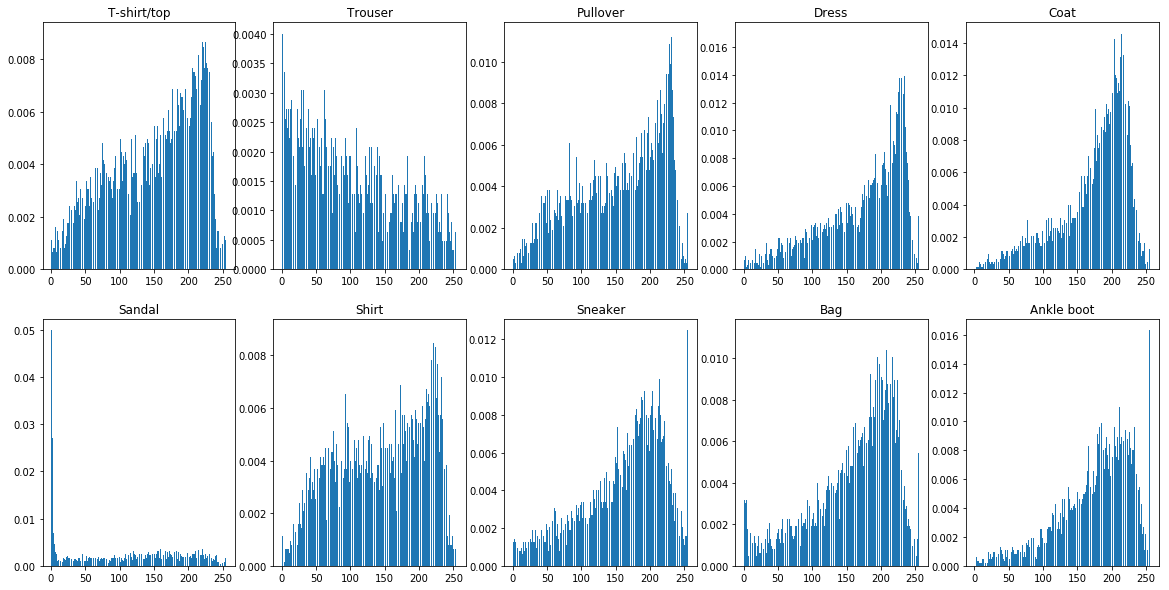

In [135]:
plot_histograms(histogramBasedNaiveBayes_clf)

## Predicción en training set

In [21]:
%time y_predicted = histogramBasedNaiveBayes_clf.predict(X_train_reshaped)

In [22]:
print((y_predicted == y_train).sum()/y_train.shape[0])

0.7885833333333333

## Predicción en testing set

In [48]:
X_test_reshaped = X_test.reshape(X_test.shape[0],-1)
%time y_predicted_test = histogramBasedNaiveBayes_clf.predict(X_test_reshaped)

CPU times: user 14.1 s, sys: 151 ms, total: 14.2 s
Wall time: 14.5 s


In [50]:
print((y_predicted_test == y_test).sum()/y_test.shape[0])

0.7348


# Subsampling

In [98]:
div = 16
X_train_sub = (X_train_reshaped/div).astype(int)
X_test_sub = (X_test_reshaped/div).astype(int)
X_train_sub.max()

15

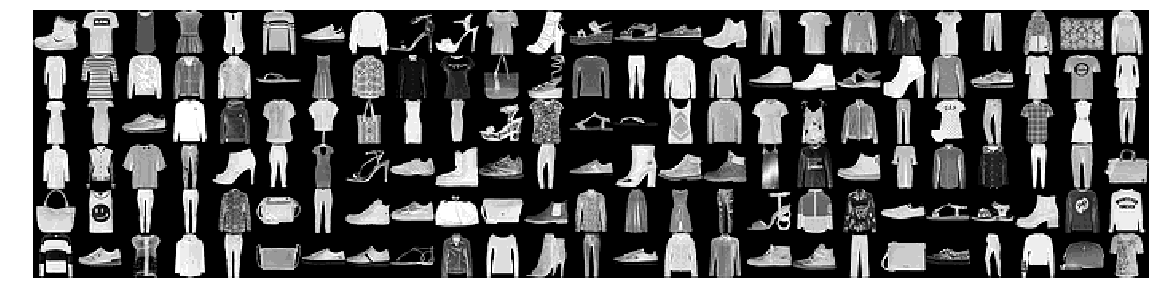

In [99]:
plot_images(X_train_sub.reshape(-1,28,28), 150, 25)

In [100]:
histogramBasedNaiveBayes_clf_sub = HistogramBasedNaiveBayes()
%time histogramBasedNaiveBayes_clf_sub.fit(X_train_sub, y_train)

CPU times: user 11 s, sys: 176 ms, total: 11.2 s
Wall time: 11.4 s


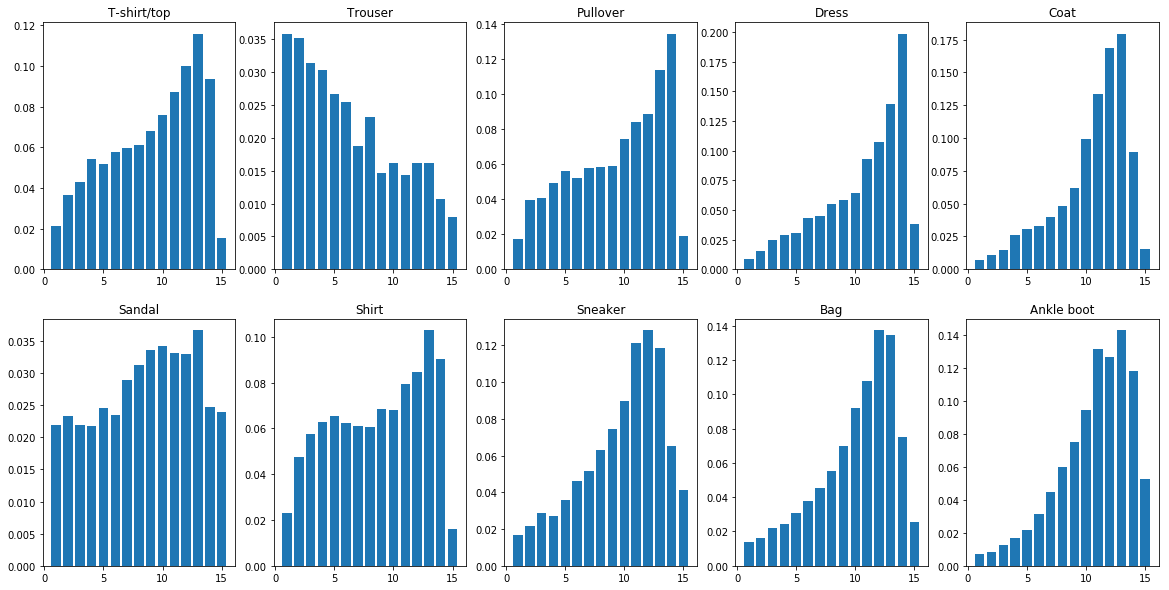

In [101]:
plot_histograms(histogramBasedNaiveBayes_clf_sub)

In [102]:
%time y_predicted_sub = histogramBasedNaiveBayes_clf_sub.predict(X_train_sub)
print((y_predicted_sub == y_train).sum()/y_train.shape[0])

CPU times: user 1min 9s, sys: 158 ms, total: 1min 10s
Wall time: 1min 10s
0.746


In [103]:
%time y_predicted_test_sub = histogramBasedNaiveBayes_clf_sub.predict(X_test_sub)
print((y_predicted_test_sub == y_test).sum()/y_test.shape[0])

CPU times: user 11.6 s, sys: 23.7 ms, total: 11.7 s
Wall time: 11.7 s
0.7354


## Naive Bayes Gaussiano

In [106]:
from sklearn.naive_bayes import GaussianNB

In [107]:
GNV_clf = GaussianNB()

In [108]:
GNV_clf.fit(X_train_reshaped, y_train)

GaussianNB(priors=None)

In [109]:
print(GNV_clf.sigma_.shape)
print(GNV_clf.theta_.shape)

(10, 784)
(10, 784)


In [110]:
from scipy.stats import norm

In [154]:
def plot_gaussians(GNV_clf, row = 14, col = 14):
    # Le estoy sacando la componente de negro para que no enmascare el resto del histograma
    sample_space = list(range(256))
    feature = (row-1)*28 + col
    f, axs = plt.subplots(2, int(len(histogramBasedNaiveBayes_clf.classes_)/2),
                        figsize=(20,8))
    for c, ax in enumerate(axs.reshape(-1)):
        ax.plot(norm.pdf(sample_space, GNV_clf.theta_[c,feature], GNV_clf.sigma_[c,feature]))
        ax.set_title(classes_names[c])
    plt.show()

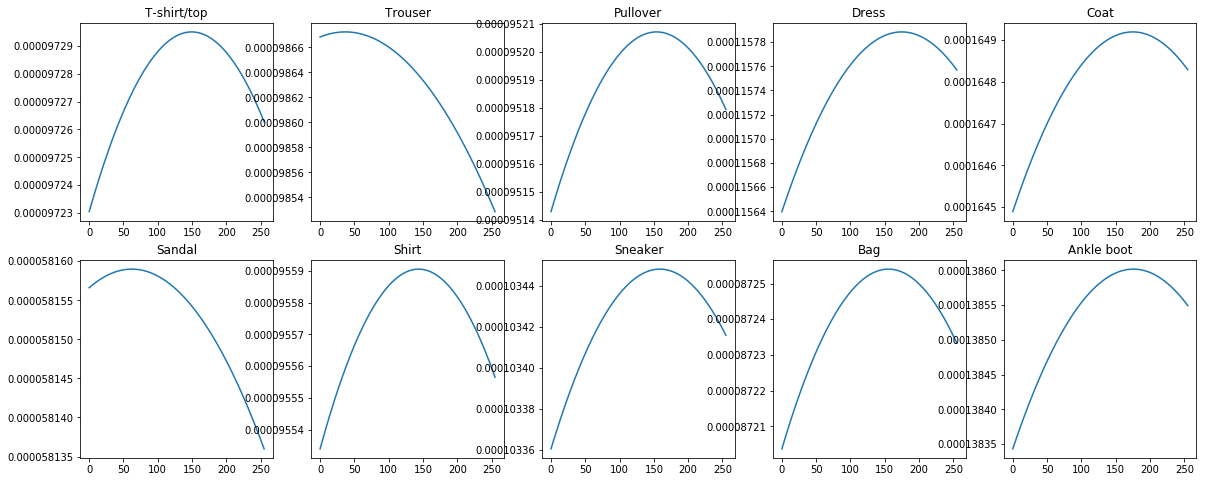

In [155]:
plot_gaussians(GNV_clf, row = 14, col = 14)

In [152]:
%time y_predicted_gnb = GNV_clf.predict(X_train_reshaped)
print((y_predicted_gnb == y_train).sum()/y_train.shape[0])

CPU times: user 4 s, sys: 3.3 s, total: 7.3 s
Wall time: 7.57 s
0.587783333333


In [153]:
%time y_predicted__test_gnb = GNV_clf.predict(X_test_reshaped)
print((y_predicted__test_gnb == y_test).sum()/y_test.shape[0])

CPU times: user 486 ms, sys: 255 ms, total: 741 ms
Wall time: 751 ms
0.5856
